# 1. 박스플롯
## 데이터 : NLS, 코로나19

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
nls97 = pd.read_csv('data/nls97.csv')
nls97.set_index('personid', inplace = True)
covidtotals = pd.read_csv('data/covidtotals_ch5.csv', parse_dates = ['lastdate'])
covidtotals.set_index('iso_code', inplace= True)

### SAT 언어능력 점수의 박스플롯

In [3]:
nls97.satverbal.describe()

count    1406.000000
mean      499.724040
std       112.166256
min        14.000000
25%       430.000000
50%       500.000000
75%       570.000000
max       800.000000
Name: satverbal, dtype: float64

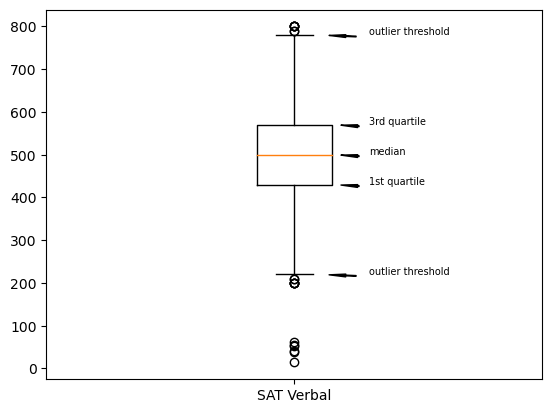

In [4]:
plt.boxplot(nls97.satverbal.dropna(), labels=['SAT Verbal'])
plt.annotate('outlier threshold', xy=(1.05, 780), xytext=(1.15, 780), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.2))
plt.annotate('3rd quartile', xy=(1.08, 570), xytext=(1.15, 570), size = 7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.2))
plt.annotate('median', xy=(1.08, 500), xytext=(1.15, 500), size = 7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.2))
plt.annotate('1st quartile', xy=(1.08, 430), xytext=(1.15, 430), size = 7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.2))
plt.annotate('outlier threshold', xy=(1.05, 220), xytext=(1.15, 220), size = 7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.2))
plt.show()

### 근무 주 수

In [5]:
weekworked = nls97.loc[:, ['highestdegree', 'weeksworked16','weeksworked17']]
weekworked.describe()

,weeksworked16,weeksworked17
count,7068.000000,6670.000000
mean,39.127476,39.016642
std,21.336629,19.465974
min,0.000000,0.000000
25%,23.000000,37.000000
50%,53.000000,49.000000
75%,53.000000,52.000000
max,53.000000,52.000000


- 상단에 수염이나 이상값이 없음 : 중앙값이 최댓값과 같거나 근접할 때 이런 모양이 나타남

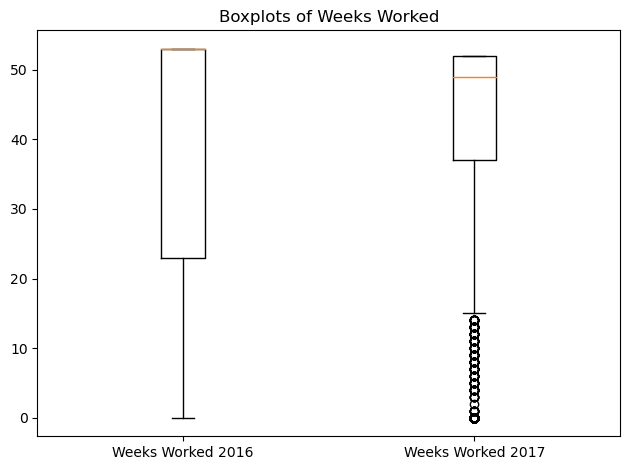

In [6]:
plt.boxplot([weekworked.weeksworked16.dropna(), weekworked.weeksworked17.dropna()], labels = ['Weeks Worked 2016', 'Weeks Worked 2017'])
plt.title('Boxplots of Weeks Worked')
plt.tight_layout()
plt.show()

### 코로나19 데이터의 기술통계 & 박스플롯

In [7]:
totvars = ['total_cases', 'total_deaths', 'total_cases_pm','total_deaths_pm']
totvarslabel = ['cases', 'deaths', 'cases per million', 'deaths per million']

In [8]:
covidtotalsonly = covidtotals[totvars]
covidtotalsonly.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,2.100000e+02,210.000000,209.000000,209.000000
mean,2.921614e+04,1770.714286,1361.842909,55.925440
std,1.363978e+05,8705.565857,2629.894101,145.081876
min,0.000000e+00,0.000000,0.894000,0.000000
25%,1.757500e+02,4.000000,96.785000,0.893000
50%,1.242500e+03,25.500000,281.997000,6.214000
75%,1.011700e+04,241.250000,1803.318000,32.158000
max,1.790191e+06,104383.000000,19771.348000,1237.551000


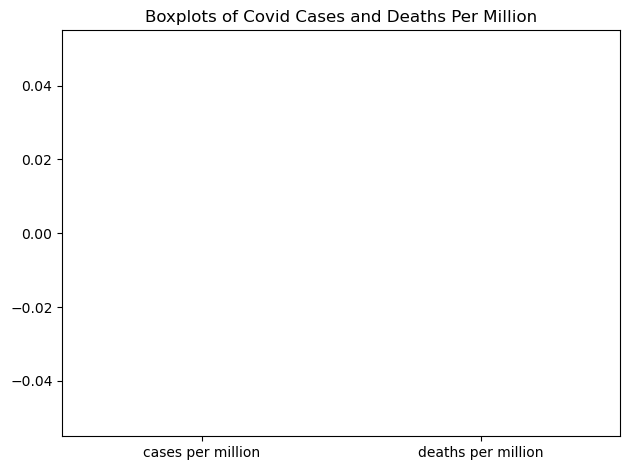

In [9]:
fig, ax = plt.subplots()
plt.title('Boxplots of Covid Cases and Deaths Per Million')
ax.boxplot([covidtotalsonly.total_cases_pm, covidtotalsonly.total_deaths_pm], labels = ['cases per million', 'deaths per million'])
plt.tight_layout()
plt.show()

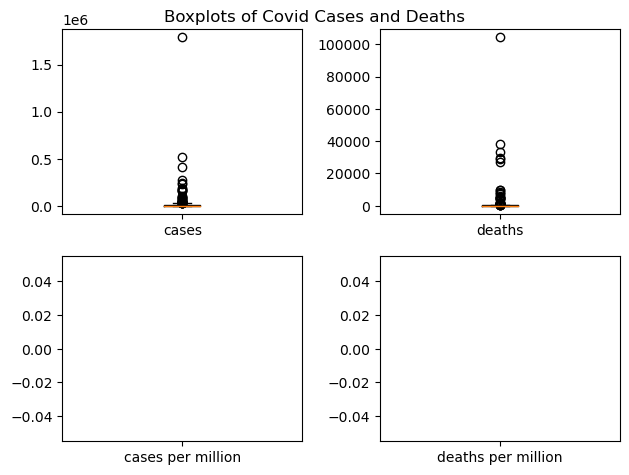

In [10]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Boxplots of Covid Cases and Deaths')
axes = axes.ravel()
for j, ax in enumerate(axes):
    ax.boxplot(covidtotalsonly.iloc[:, j], labels=[totvarslabel[j]])
    
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

# 2. 그룹별 박스플롯
## 특정 그룹에서 예상치 못한 값 찾기
---
### 학력별 근무 주 수의 중앙값/제1사분위수/제3사분위수 시각화
- 시리즈 반환 함수 정의 -> apply로 각 그룹에 대한 함수 호출

In [12]:
def gettots(x):
    out = {}
    out['min'] = x.min()
    out['qr1'] = x.quantile(0.25)
    out['med'] = x.median()
    out['qr3'] = x.quantile(0.75)
    out['max'] = x.max()
    out['count'] = x.count()
    return pd.Series(out)

In [14]:
nls97.groupby(['highestdegree'])['weeksworked17'].apply(gettots).unstack()

,min,qr1,med,qr3,max,count
highestdegree,,,,,,
0. None,0.0,0.0,40.0,52.0,52.0,510.0
1. GED,0.0,8.0,47.0,52.0,52.0,848.0
2. High School,0.0,31.0,49.0,52.0,52.0,2665.0
3. Associates,0.0,42.0,49.0,52.0,52.0,593.0
4. Bachelors,0.0,45.0,50.0,52.0,52.0,1342.0
5. Masters,0.0,46.0,50.0,52.0,52.0,538.0
6. PhD,0.0,46.5,50.0,52.0,52.0,51.0
7. Professional,0.0,47.0,50.0,52.0,52.0,97.0


### 학력별 근무 주 수의 박스플롯

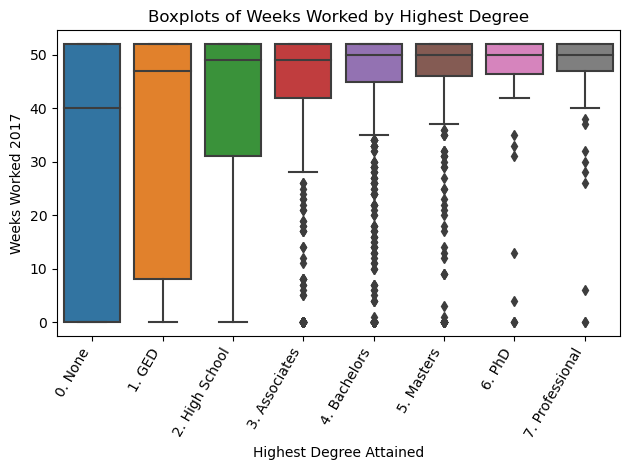

In [21]:
myplt = sns.boxplot('highestdegree', 'weeksworked17', data = nls97, order = sorted(nls97.highestdegree.dropna().unique()))
myplt.set_title('Boxplots of Weeks Worked by Highest Degree')
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2017')
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right') #텍스트 오른쪽 정렬
plt.tight_layout()
plt.show()

In [26]:
covidtotals.groupby(['region'])['total_cases_pm'].apply(gettots).unstack()

,min,qr1,med,qr3,max,count
region,,,,,,
Caribbean,95.035,251.51850,339.0095,1726.15975,4435.327,22.0
Central Africa,14.696,71.09900,367.5180,1538.36600,3317.196,11.0
Central America,93.053,924.54750,1447.8430,2190.56500,10274.481,7.0
Central Asia,373.866,918.89625,1974.4910,2906.75950,10593.831,6.0
East Africa,8.521,65.41800,190.1960,268.91700,5015.172,13.0
East Asia,2.611,15.98500,64.6315,269.34525,7825.695,16.0
Eastern Europe,346.726,882.72775,1189.8350,2317.46025,6854.143,22.0
North Africa,105.342,202.14600,421.0720,426.71700,793.067,5.0
North America,2290.093,2566.99750,2843.9020,6327.77900,9811.656,3.0
